In [1]:
gamma =   [               0.01,                0.05,                 0.1,                  0.2,                 0.3,                  0.4,                 0.5,                 0.6,                 0.7,                  0.8,              0.9,                      1.0]
s_fac =   [-0.9824078756976168, -0.971735292763572,  -0.963581257201065,   -0.9423554239669681, -0.9184457566243576, -0.8954250261736132,  -0.8709294868770989, -0.8461207921707072, -0.8220145924932375,  -0.7976074256438479, -0.7745194612610665,  -0.7437706097893396]
ipr_fac = [-0.3944701526444681, -0.3907241564518467, -0.37632200541135047, -0.3570662849265972, -0.3371227634053126, -0.31877685819203183, -0.3027479580545024, -0.2858357148443896, -0.26877097703200803, -0.2527990754795069, -0.23616633614194069, -0.22670438203241952]

In [2]:
r_0 = []
iprratio = []
for i in range(len(gamma)):
    r_0.append(-1.0 / (gamma[i] * s_fac[i]))
    iprratio.append(ipr_fac[i]/ s_fac[i])
print(r_0)
print(iprratio)

[101.79071490951668, 20.58173676405319, 10.3779519633323, 5.305853686236396, 3.6293197603575624, 2.791970211825727, 2.2963971597418538, 1.9697739165478538, 1.7378905941784497, 1.567187014327217, 1.4345812683673675, 1.3445005581535858]
[0.40153398848146576, 0.4020890867724322, 0.39054516949038737, 0.37890829282170424, 0.3670578920679745, 0.3560061969166187, 0.3476147754970026, 0.3378190413109733, 0.3269661870804552, 0.31694674266032746, 0.3049198218433614, 0.3048041681784518]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

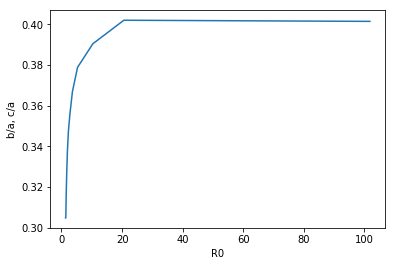

In [4]:
plt.xlabel("R0")
plt.ylabel("b/a, c/a")
plt.plot(r_0, iprratio)

In [5]:
import numpy, pandas
titles = ['r_0', 'iprratio']
matrix = [r_0, iprratio]
df = pandas.DataFrame(numpy.array(matrix).T, columns=titles)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
r_0,12.0,12.902323,28.544439,1.344501,1.695215,2.544184,6.573878,101.790715
iprratio,12.0,0.352934,0.035579,0.304804,0.324461,0.351810,0.381818,0.402089


In [6]:
df.corr()

,r_0,iprratio
r_0,1.000000,0.561217
iprratio,0.561217,1.000000


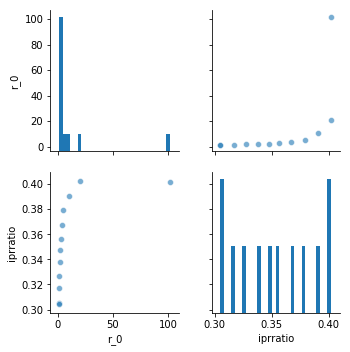

In [7]:
import seaborn as sns
sns.pairplot(df,
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
y = df['iprratio'].values
df = df.drop('iprratio', axis=1)
x = df.values
lm = LinearRegression(fit_intercept=True)
lm.fit(x, y)
y_pred = lm.predict(x)
msg = 'model: iprratio = {} + {} R_0'.format(lm.intercept_, lm.coef_[0])
print(msg)

model: iprratio = 0.34390882934353284 + 0.00069952138163401 R_0
